In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sentiment Analysis Function

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
def sentiment_analysis(tweet):
    score = analyzer.polarity_scores(tweet)["compound"]
    return score

## Importing our data

In [3]:
tweet_data=pd.read_csv('stock_tweets.csv')
tweet_data.head()

,Date,Tweet,Stock_Name,Company_Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [4]:
stock_data=pd.read_csv('stock_yfinance_data.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Stock_Name
0,30-09-2021,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,01-10-2021,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,04-10-2021,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,05-10-2021,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,06-10-2021,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [5]:
stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.strftime("%Y-%m-%d")
stock_data.head()

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\1372698117.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.strftime("%Y-%m-%d")


,Date,Open,High,Low,Close,Adj_Close,Volume,Stock_Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-01-10,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-04-10,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-05-10,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-06-10,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [6]:
## checking if the timeframe of tweet and stock price data is same
print(f'last date of the tweet data {max(tweet_data.Date)}')
print(f'start date of the tweet data {min(tweet_data.Date)}')
print(f'last date of the stock data {max(stock_data.Date)}')
print(f'first date of the stock data {min(stock_data.Date)}')
print("Thus both stock price and tweet data available is in same time frame")

last date of the tweet data 2022-09-29 23:41:16+00:00
start date of the tweet data 2021-09-30 00:06:02+00:00
last date of the stock data 2022-12-09
first date of the stock data 2021-01-10
Thus both stock price and tweet data available is in same time frame


## feature engineering

In [7]:
## let us add column to the stock price dataframe which shows the max stock price fluctuation
stock_data['Fluctuation'] = stock_data.High - stock_data.Low
## let us add column to the stock price dataframe which shows the net rise in stock price
stock_data['Price_Gain'] = stock_data.Close - stock_data.Open
## let us add column to the stock price dataframe which shows the total valuation at the end of the day
stock_data['Total_Valuation_EOD'] = stock_data.Volume * stock_data.Close

In [8]:
stock_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Stock_Name,Fluctuation,Price_Gain,Total_Valuation_EOD
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709992,-1.839996,1.392452e+10
1,2021-01-10,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10
2,2021-04-10,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10
3,2021-05-10,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10
4,2021-06-10,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10


## Cleaning text

In [9]:
import re
tweet_data['Tweet'] = tweet_data.apply(lambda row: row['Tweet'].lower(),axis=1) #removed capitalisation
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Tweet']),axis=1) #removed mentions
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Tweet']),axis=1) #removed hashtags
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub(r"http\S+","", row['Tweet']),axis=1) #removed websites
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub(r"www.\S+","", row['Tweet']),axis=1)
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub('[()!?]'," ", row['Tweet']),axis=1) #removed puncs
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub('\[.*?\]'," ", row['Tweet']),axis=1) 
tweet_data['Tweet'] = tweet_data.apply(lambda row: re.sub("[^a-z]"," ", row['Tweet']),axis=1)

tweet_data[['Tweet']].head()

,Tweet
0,mainstream media has done an amazing job at br...
1,tesla delivery estimates are at around k fr...
2,even if i include m unvested rsus as of...
3,hahaha why are you still trying to stop tes...
4,stop trying to kill kids you sad deranged o...


## sentiment analysis

In [10]:
tweet_data['Sentiment'] = tweet_data['Tweet'].apply(lambda x : sentiment_analysis(x))
tweet_data.head()

,Date,Tweet,Stock_Name,Company_Name,Sentiment
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29 23:18:08+00:00,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29 22:40:07+00:00,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096
4,2022-09-29 22:27:05+00:00,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750


In [11]:
#anchor is created by adding tweet date and stock name
# creating Anchor Column for tweet_data
tweet_data.insert(1, "Date_string", tweet_data.Date.astype("str").str.split(" "))
tweet_data.Date_string = [element[0] for element in tweet_data.Date_string]
tweet_data.insert(0, "anchor", tweet_data.Date_string + tweet_data.Stock_Name)

# creating Anchor Column for stock_data
stock_data.insert(1, "Date_string", stock_data.Date.astype("str").str.split(" "))
stock_data.Date_string = [element[0] for element in stock_data.Date_string]
stock_data.insert(0, "anchor", stock_data.Date_string + stock_data.Stock_Name)


In [12]:
tweet_data.head()

,anchor,Date,Date_string,Tweet,Stock_Name,Company_Name,Sentiment
0,2022-09-29TSLA,2022-09-29 23:41:16+00:00,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29TSLA,2022-09-29 23:24:43+00:00,2022-09-29,tesla delivery estimates are at around k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29TSLA,2022-09-29 23:18:08+00:00,2022-09-29,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29TSLA,2022-09-29 22:40:07+00:00,2022-09-29,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096
4,2022-09-29TSLA,2022-09-29 22:27:05+00:00,2022-09-29,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750


Positive Count: 42104
Negative Count: 16328
Zero Count: 22361


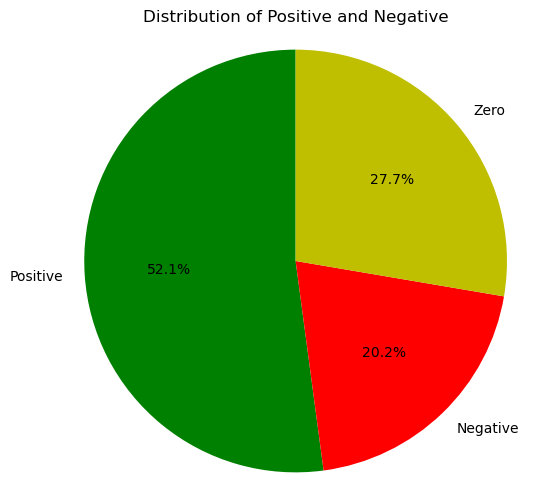

In [13]:
positive_count = (tweet_data['Sentiment'] > 0).sum()  # count positive values
negative_count = (tweet_data['Sentiment'] < 0).sum()  # count negative values
zero_count = (tweet_data['Sentiment'] == 0).sum()  # count zero values

# display counts
print("Positive Count:", positive_count)
print("Negative Count:", negative_count)
print("Zero Count:", zero_count)

labels = ['Positive', 'Negative' , 'Zero']
sizes = [positive_count, negative_count, zero_count]
colors = ['g', 'r', 'y' ]  

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Positive and Negative')
plt.show()


In [14]:
stock_data.head()

,anchor,Date,Date_string,Open,High,Low,Close,Adj_Close,Volume,Stock_Name,Fluctuation,Price_Gain,Total_Valuation_EOD
0,2021-09-30TSLA,2021-09-30,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,4.709992,-1.839996,1.392452e+10
1,2021-01-10TSLA,2021-01-10,2021-01-10,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,5.730011,-1.059998,1.320308e+10
2,2021-04-10TSLA,2021-04-10,2021-04-10,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,10.283325,-4.989990,2.382361e+10
3,2021-05-10TSLA,2021-05-10,2021-05-10,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,7.703308,-1.403351,1.438830e+10
4,2021-06-10TSLA,2021-06-10,2021-06-10,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,4.480011,2.183319,1.145382e+10


In [15]:
# merging the two dataframe on the anchor
data = pd.merge(tweet_data, stock_data , on="anchor")
data.head()

,anchor,Date_x,Date_string_x,Tweet,Stock_Name_x,Company_Name,Sentiment,Date_y,Date_string_y,Open,High,Low,Close,Adj_Close,Volume,Stock_Name_y,Fluctuation,Price_Gain,Total_Valuation_EOD
0,2022-09-29TSLA,2022-09-29 23:41:16+00:00,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
1,2022-09-29TSLA,2022-09-29 23:24:43+00:00,2022-09-29,tesla delivery estimates are at around k fr...,TSLA,"Tesla, Inc.",0.0000,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
2,2022-09-29TSLA,2022-09-29 23:18:08+00:00,2022-09-29,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
3,2022-09-29TSLA,2022-09-29 22:40:07+00:00,2022-09-29,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
4,2022-09-29TSLA,2022-09-29 22:27:05+00:00,2022-09-29,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10


In [16]:
# let us convert the string date column "date_str_x" to datetime
data.Date_string_x = pd.to_datetime(data.Date_string_x)
# since we are aiming to see the impact of tweets on stock value (i.e. rise and fall), we can drop "neutral" sentiments
data = data[data.Sentiment != 0]
data.head()

,anchor,Date_x,Date_string_x,Tweet,Stock_Name_x,Company_Name,Sentiment,Date_y,Date_string_y,Open,High,Low,Close,Adj_Close,Volume,Stock_Name_y,Fluctuation,Price_Gain,Total_Valuation_EOD
0,2022-09-29TSLA,2022-09-29 23:41:16+00:00,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
2,2022-09-29TSLA,2022-09-29 23:18:08+00:00,2022-09-29,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
3,2022-09-29TSLA,2022-09-29 22:40:07+00:00,2022-09-29,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
4,2022-09-29TSLA,2022-09-29 22:27:05+00:00,2022-09-29,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10
6,2022-09-29TSLA,2022-09-29 22:24:22+00:00,2022-09-29,for years viciously silenced critics failin...,TSLA,"Tesla, Inc.",-0.9325,2022-09-29,2022-09-29,282.76001,283.649994,265.779999,268.209992,268.209992,77620600,TSLA,17.869995,-14.550018,2.081862e+10


In [17]:
## only keeping the valuable data
preprocessed_data=data[
    [
        "Date_x",
        "Date_string_x",
        "Tweet",
        "Stock_Name_x",
        "Company_Name",
        "Sentiment",
        "Open",
        "High",
        "Low",
        "Close",
        "Volume",
        "Fluctuation",
        "Price_Gain",
        "Total_Valuation_EOD"
    ]
]
preprocessed_data = preprocessed_data.copy()
## counter is use to count number of positive and negative tweets per day 
## counter= daily tweet volume
preprocessed_data["counter"] = 1
preprocessed_data.head(5)

,Date_x,Date_string_x,Tweet,Stock_Name_x,Company_Name,Sentiment,Open,High,Low,Close,Volume,Fluctuation,Price_Gain,Total_Valuation_EOD,counter
0,2022-09-29 23:41:16+00:00,2022-09-29,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,282.76001,283.649994,265.779999,268.209992,77620600,17.869995,-14.550018,2.081862e+10,1
2,2022-09-29 23:18:08+00:00,2022-09-29,even if i include m unvested rsus as of...,TSLA,"Tesla, Inc.",0.2960,282.76001,283.649994,265.779999,268.209992,77620600,17.869995,-14.550018,2.081862e+10,1
3,2022-09-29 22:40:07+00:00,2022-09-29,hahaha why are you still trying to stop tes...,TSLA,"Tesla, Inc.",-0.7096,282.76001,283.649994,265.779999,268.209992,77620600,17.869995,-14.550018,2.081862e+10,1
4,2022-09-29 22:27:05+00:00,2022-09-29,stop trying to kill kids you sad deranged o...,TSLA,"Tesla, Inc.",-0.8750,282.76001,283.649994,265.779999,268.209992,77620600,17.869995,-14.550018,2.081862e+10,1
6,2022-09-29 22:24:22+00:00,2022-09-29,for years viciously silenced critics failin...,TSLA,"Tesla, Inc.",-0.9325,282.76001,283.649994,265.779999,268.209992,77620600,17.869995,-14.550018,2.081862e+10,1


## plot for number of positive and negative tweets

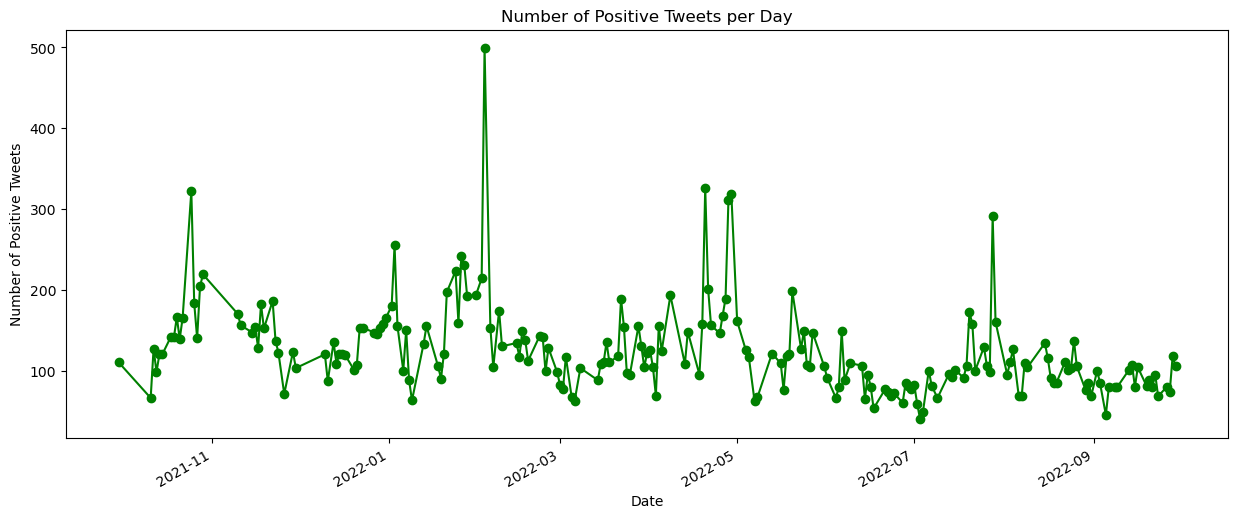

In [18]:
positive_tweets = preprocessed_data[preprocessed_data['Sentiment'] > 0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()
plt.figure(figsize=(15, 6))
positive_tweets_per_day.plot(kind='line', marker='o', color='green')
plt.title('Number of Positive Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Positive Tweets')
plt.show()

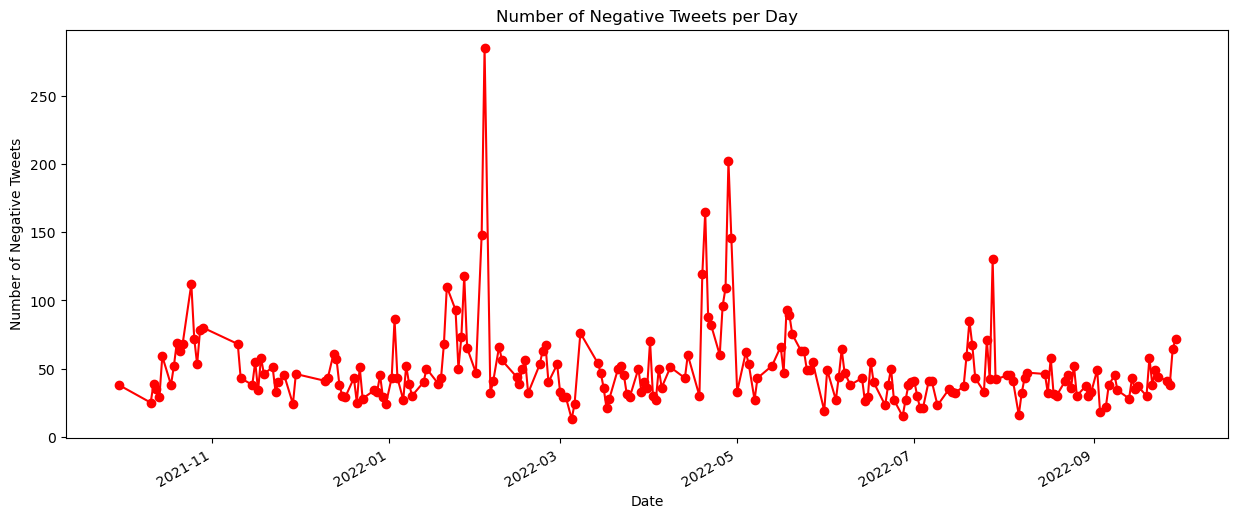

In [19]:
negative_tweets = preprocessed_data[preprocessed_data['Sentiment'] < 0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()
plt.figure(figsize=(15, 6))
negative_tweets_per_day.plot(kind='line', marker='o', color='red')
plt.title('Number of Negative Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Negative Tweets')
plt.show()

In our dataset, we have total 25 companies, namely
Tesla, Inc.                                           17562
Taiwan Semiconductor Manufacturing Company Limited     4405
Apple Inc.                                             2347
Procter & Gamble Company                               2033
Amazon.com, Inc.                                       2033
Microsoft Corporation                                  2033
Meta Platforms, Inc.                                   1357
NIO Inc.                                               1153
Advanced Micro Devices, Inc.                           1097
Netflix, Inc.                                           949
Alphabet Inc.                                           609
PayPal Holdings, Inc.                                   393
The Walt Disney Company                                 255
Costco Wholesale Corporation                            176
The Boeing Company                                      149
The Coca-Cola Company                            

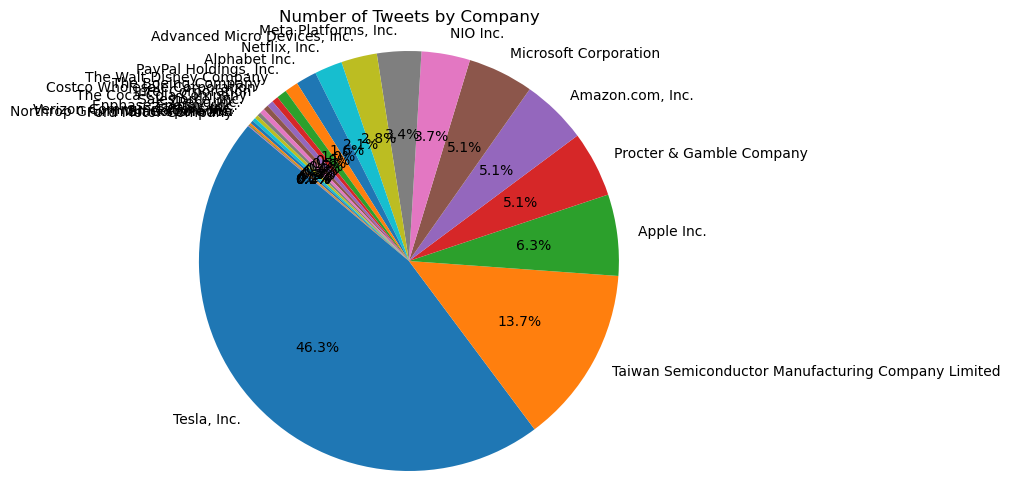

In [20]:
print(
    f"In our dataset, we have total {len(preprocessed_data.Company_Name.value_counts())} companies, namely\n{preprocessed_data.Company_Name.value_counts()}"
)
## pie chart of number of tweets to company

company_counts = tweet_data['Company_Name'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Tweets by Company')
plt.axis('equal')  
plt.show()


## making individual datasets for companies

In [21]:
# let us make datasets for top 3 companies
tesla_df = preprocessed_data[preprocessed_data.Stock_Name_x == "TSLA"]
taiwanSMC_df = preprocessed_data[preprocessed_data.Stock_Name_x == "TSM"]
apple_df = preprocessed_data[preprocessed_data.Stock_Name_x == "AAPL"]

In [22]:
# for simplicity, we will further form 2 sub dataframes per company based on the sentiments: positive and negative
pos_tesla_df = tesla_df[tesla_df.Sentiment > 0]
pos_taiwanSMC_df = taiwanSMC_df[taiwanSMC_df.Sentiment >0]
pos_apple_df = apple_df[apple_df.Sentiment > 0]

neg_tesla_df = tesla_df[tesla_df.Sentiment <0]
neg_taiwanSMC_df = taiwanSMC_df[taiwanSMC_df.Sentiment <0]
neg_apple_df = apple_df[apple_df.Sentiment <0]


In [23]:
# let us create dataset with limited values that give us a brief info about rise and fall in total valuation of the company over time
ovr_pos_tesla_df = pos_tesla_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_pos_taiwanSMC_df = pos_taiwanSMC_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_pos_apple_df = pos_apple_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})

ovr_neg_tesla_df = neg_tesla_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_neg_taiwanSMC_df = neg_taiwanSMC_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})
ovr_neg_apple_df = neg_apple_df.groupby(by=["Date_string_x","Fluctuation", "Price_Gain", "Total_Valuation_EOD","Sentiment"], as_index=False).agg({"counter":pd.Series.sum})

## Case1: Tesla

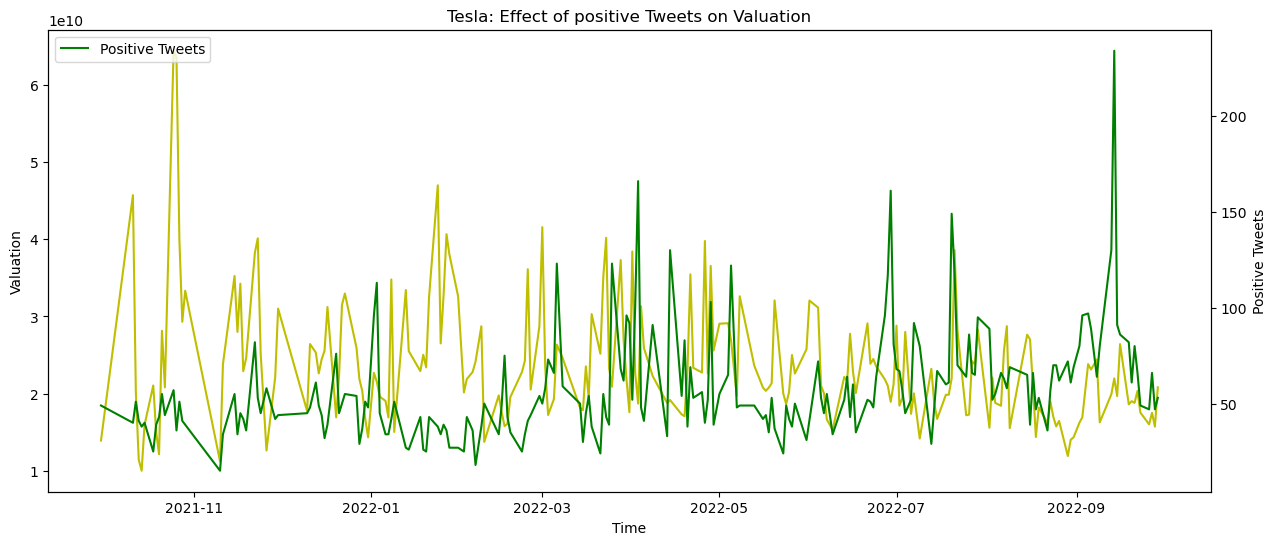

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of positive Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    pos_tesla_df.Date_string_x,
    pos_tesla_df.Total_Valuation_EOD,
    color="y",
    label="Valuation",
)


positive_tweets = tesla_df[tesla_df['Sentiment'] > 0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()


ax2.plot(
    pos_tesla_df.Date_string_x.unique(),
    positive_tweets_per_day,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\2052332116.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ovr_pos_tesla_df.corr()
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\2052332116.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

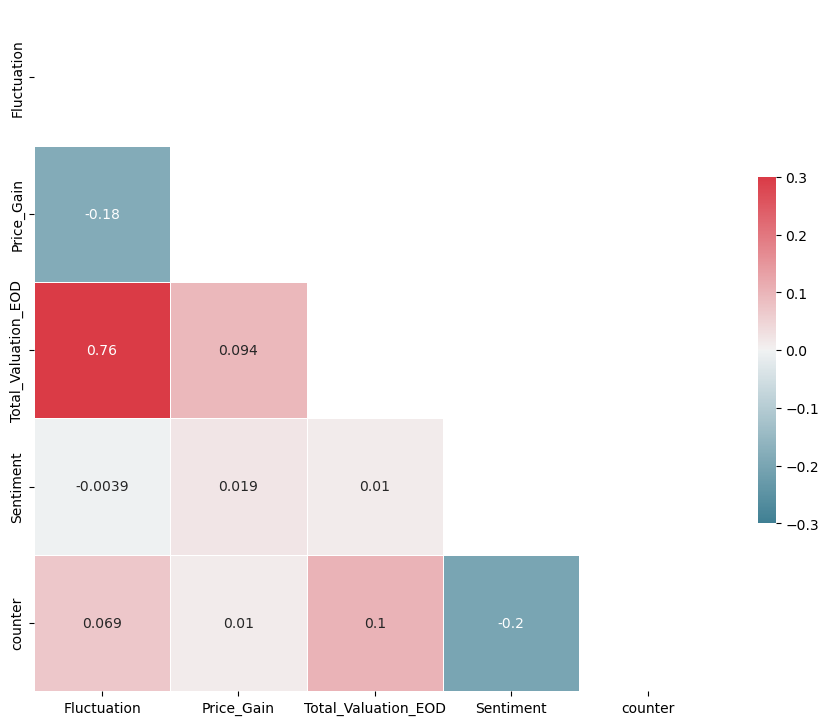

In [25]:
# correlation matrix
corr = ovr_pos_tesla_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# drawing heatmap
sns.heatmap(
    corr,          
    mask=mask,     
    cmap=cmap,     
    annot=True,    
    vmax=.3,      
    vmin=-.3,     
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}
    
)

C:\Users\sinha\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


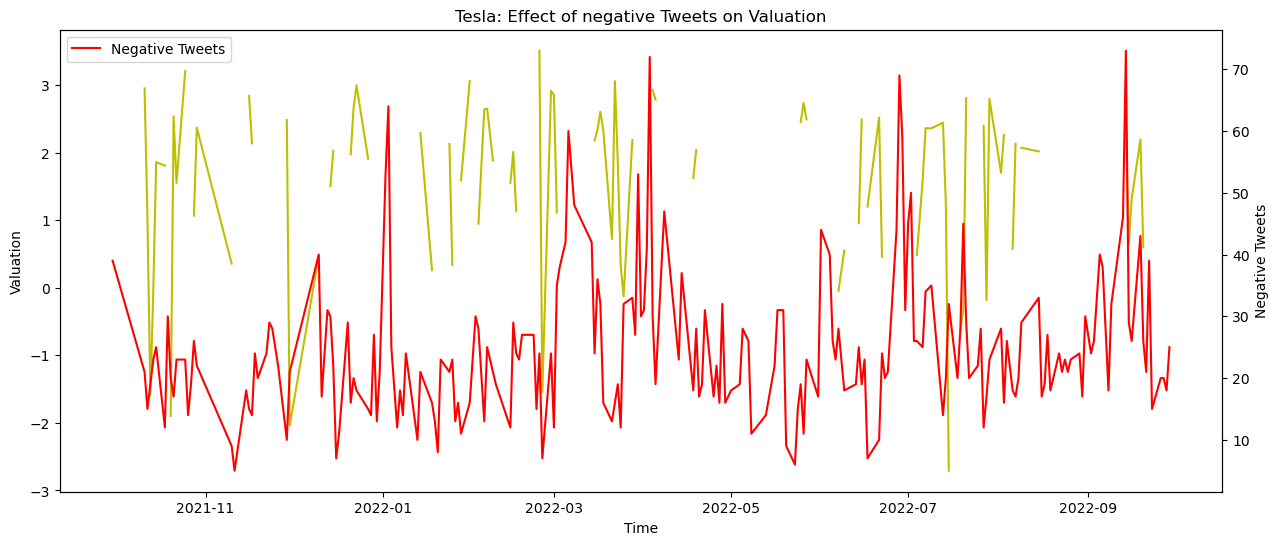

In [26]:
plt.figure(figsize=(15, 6))
plt.title("Tesla: Effect of negative Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    neg_tesla_df.Date_string_x,
    np.log(neg_tesla_df.Price_Gain),    
    color="y",
    label="Valuation",
)


negative_tweets = tesla_df[tesla_df['Sentiment'] < 0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()


ax2.plot(
    neg_tesla_df.Date_string_x.unique(),
    negative_tweets_per_day,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\376056486.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ovr_neg_tesla_df.corr()
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\376056486.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

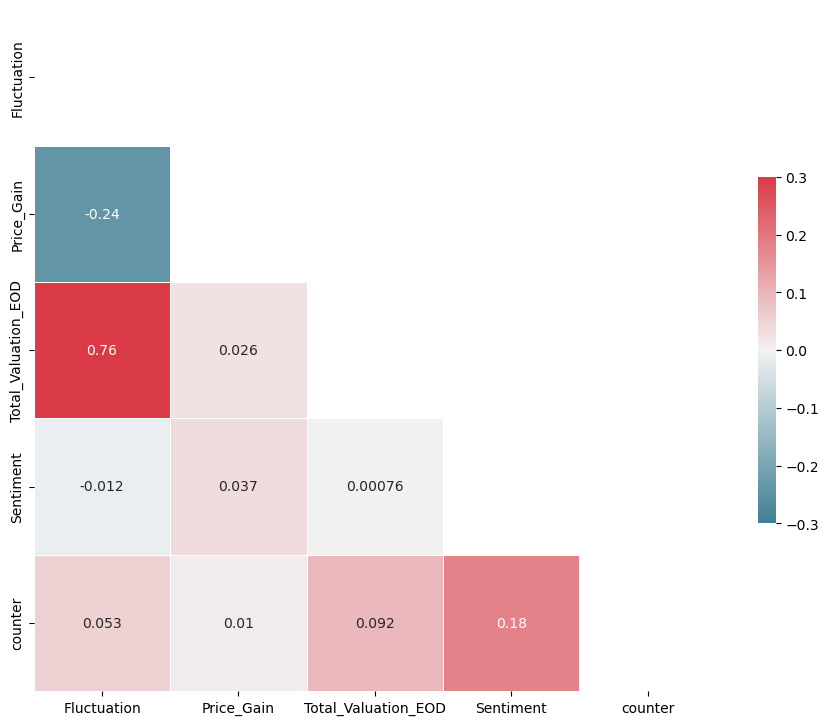

In [27]:
# correlation matrix
corr = ovr_neg_tesla_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# drawing heatmap
sns.heatmap(
    corr,          
    mask=mask,     
    cmap=cmap,     
    annot=True,    
    vmax=.3,      
    vmin=-.3,     
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}
    
)

## case2: taiwan SMC

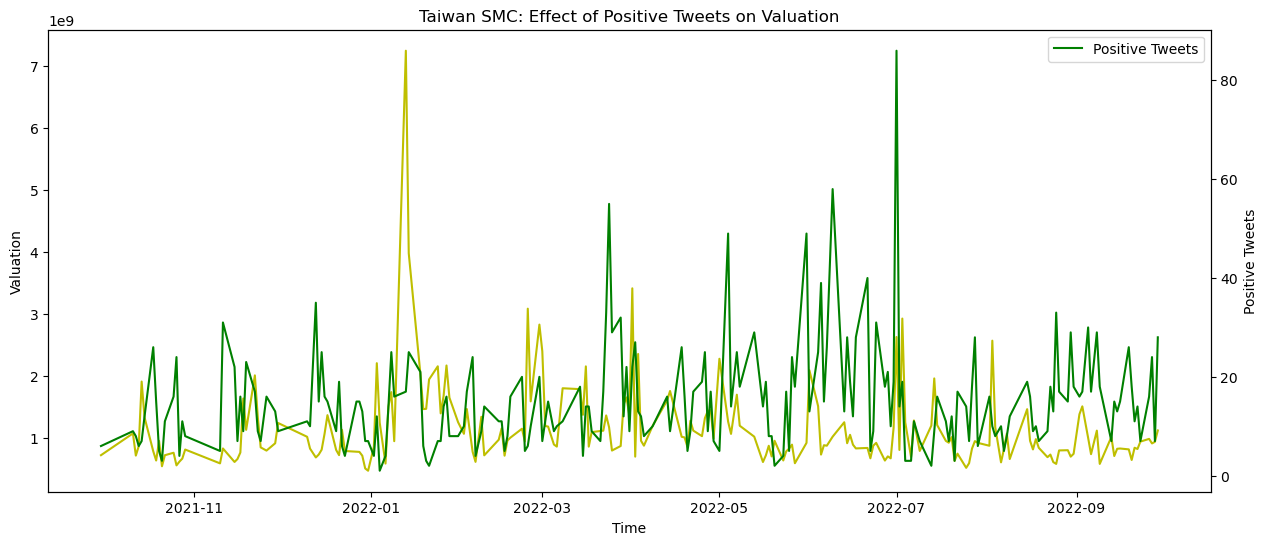

In [28]:
plt.figure(figsize=(15, 6))
plt.title("Taiwan SMC: Effect of Positive Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    pos_taiwanSMC_df.Date_string_x,
    pos_taiwanSMC_df.Total_Valuation_EOD,
    color="y",
    label="Valuation",
)


positive_tweets = taiwanSMC_df[taiwanSMC_df['Sentiment'] >0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()


ax2.plot(
    pos_taiwanSMC_df.Date_string_x.unique(),
    positive_tweets_per_day,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\2819256435.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ovr_pos_taiwanSMC_df.corr()
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\2819256435.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

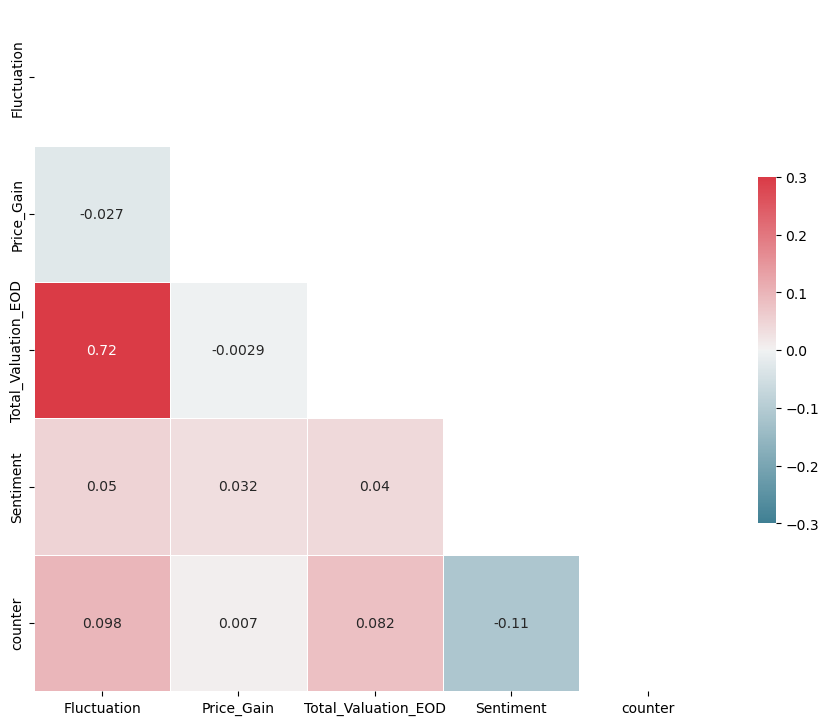

In [29]:
# correlation matrix
corr = ovr_pos_taiwanSMC_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# drawing heatmap
sns.heatmap(
    corr,          
    mask=mask,     
    cmap=cmap,     
    annot=True,    
    vmax=.3,      
    vmin=-.3,     
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}
    
)

C:\Users\sinha\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sinha\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


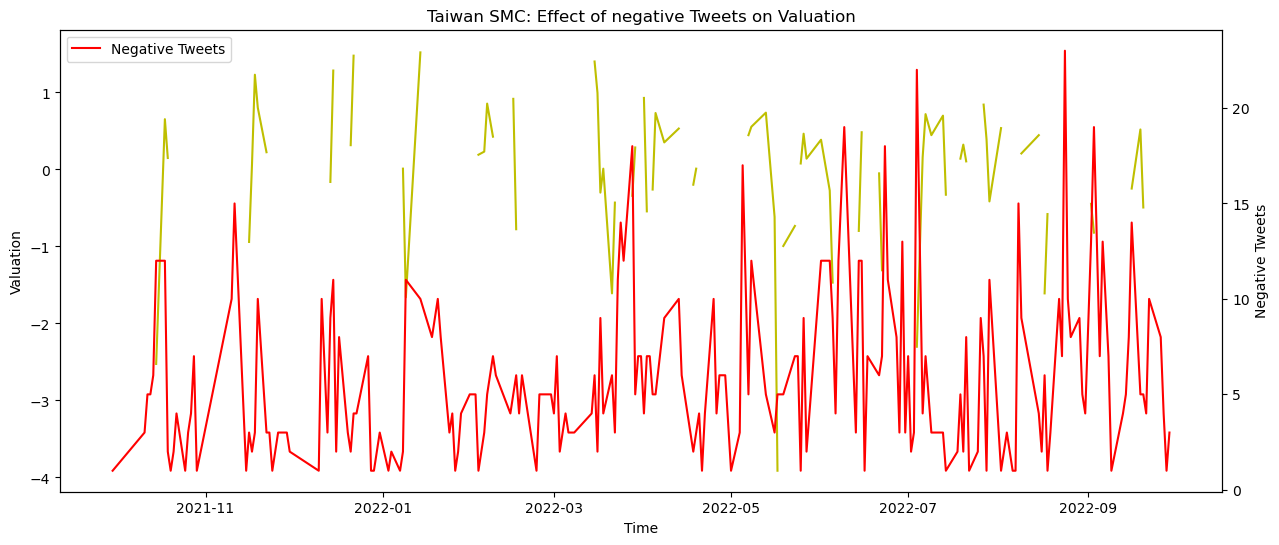

In [30]:
plt.figure(figsize=(15, 6))
plt.title("Taiwan SMC: Effect of negative Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    neg_taiwanSMC_df.Date_string_x,
    np.log(neg_taiwanSMC_df.Price_Gain),    
    color="y",
    label="Valuation",
)


negative_tweets = taiwanSMC_df[taiwanSMC_df['Sentiment'] <0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()


ax2.plot(
    neg_taiwanSMC_df.Date_string_x.unique(),
    negative_tweets_per_day,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\3409624019.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ovr_neg_taiwanSMC_df.corr()
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\3409624019.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

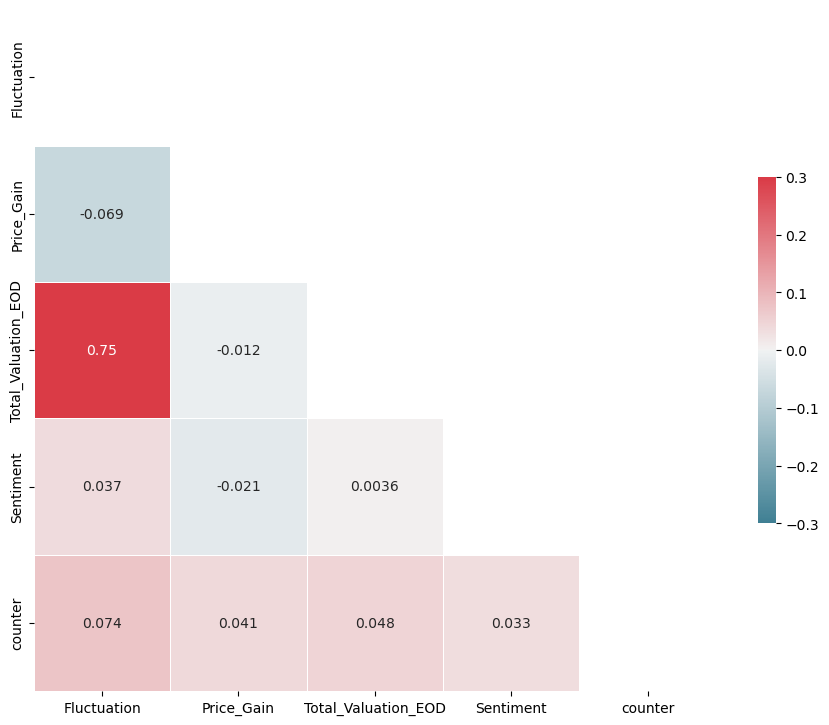

In [31]:
# correlation matrix
corr = ovr_neg_taiwanSMC_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# drawing heatmap
sns.heatmap(
    corr,          
    mask=mask,     
    cmap=cmap,     
    annot=True,    
    vmax=.3,      
    vmin=-.3,     
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}
    
)

## case3: Apple

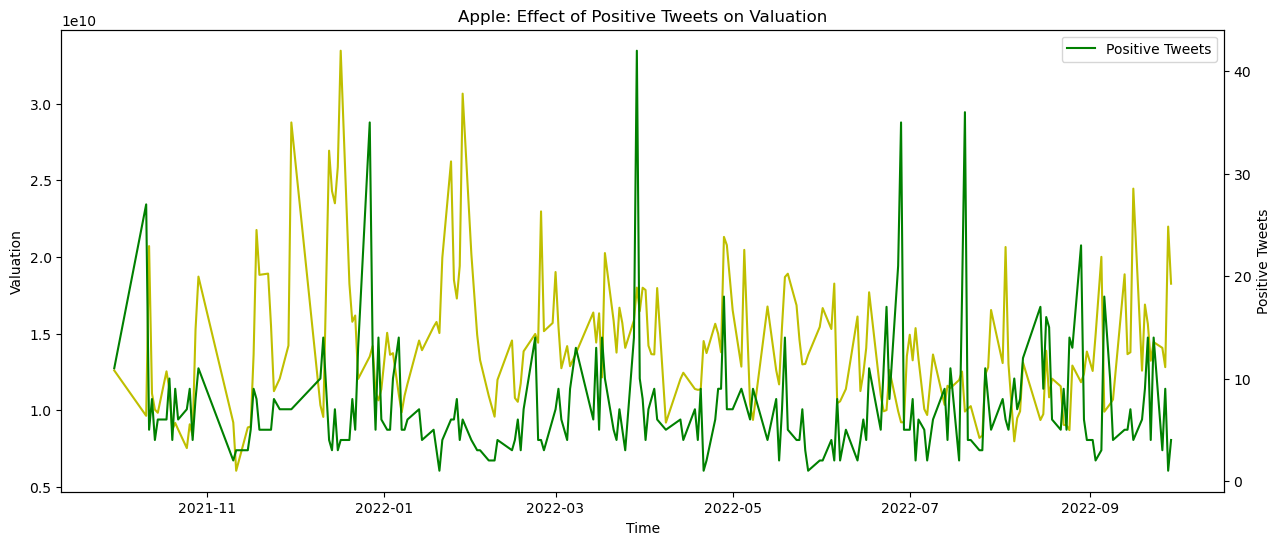

In [32]:
plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of Positive Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    pos_apple_df.Date_string_x,
    pos_apple_df.Total_Valuation_EOD,
    color="y",
    label="Valuation",
)

positive_tweets = apple_df[apple_df['Sentiment'] > 0]
positive_tweets_per_day = positive_tweets.groupby('Date_string_x').size()


ax2.plot(
    pos_apple_df.Date_string_x.unique(),
    positive_tweets_per_day,
    color="g",
    label="Positive Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Positive Tweets")

plt.legend()
plt.show()

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\2018349572.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ovr_pos_apple_df.corr()
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\2018349572.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

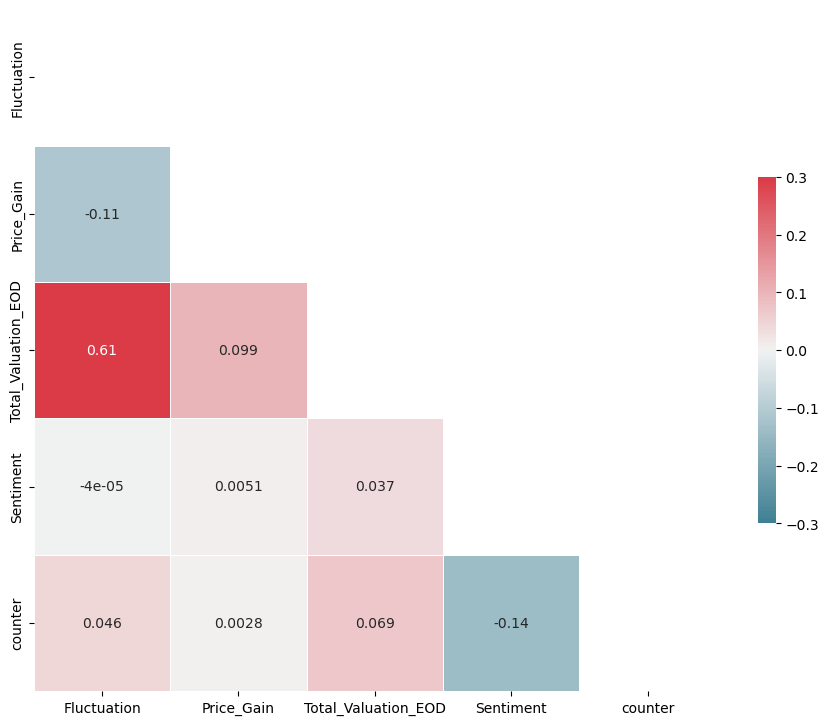

In [33]:
# correlation matrix
corr = ovr_pos_apple_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# drawing heatmap
sns.heatmap(
    corr,          
    mask=mask,     
    cmap=cmap,     
    annot=True,    
    vmax=.3,      
    vmin=-.3,     
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}
    
)

C:\Users\sinha\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


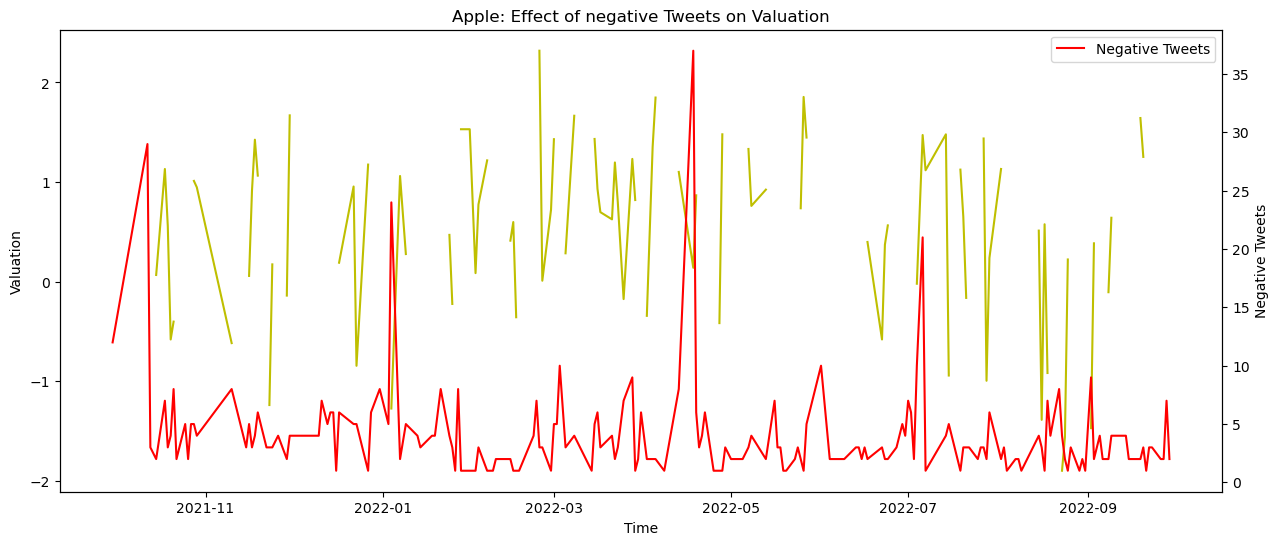

In [34]:
plt.figure(figsize=(15, 6))
plt.title("Apple: Effect of negative Tweets on Valuation")
ax1 = plt.gca()
ax2 = plt.twinx()


ax1.plot(
    neg_apple_df.Date_string_x,
    np.log(neg_apple_df.Price_Gain),    
    color="y",
    label="Valuation",
)


negative_tweets = apple_df[apple_df['Sentiment'] < 0]
negative_tweets_per_day = negative_tweets.groupby('Date_string_x').size()


ax2.plot(
    neg_apple_df.Date_string_x.unique(),
    negative_tweets_per_day,
    color="r",
    label="Negative Tweets",
)

ax1.set_xlabel("Time")
ax1.set_ylabel("Valuation")
ax2.set_ylabel("Negative Tweets")

plt.legend()
plt.show()

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\66035550.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ovr_neg_apple_df.corr()
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\66035550.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

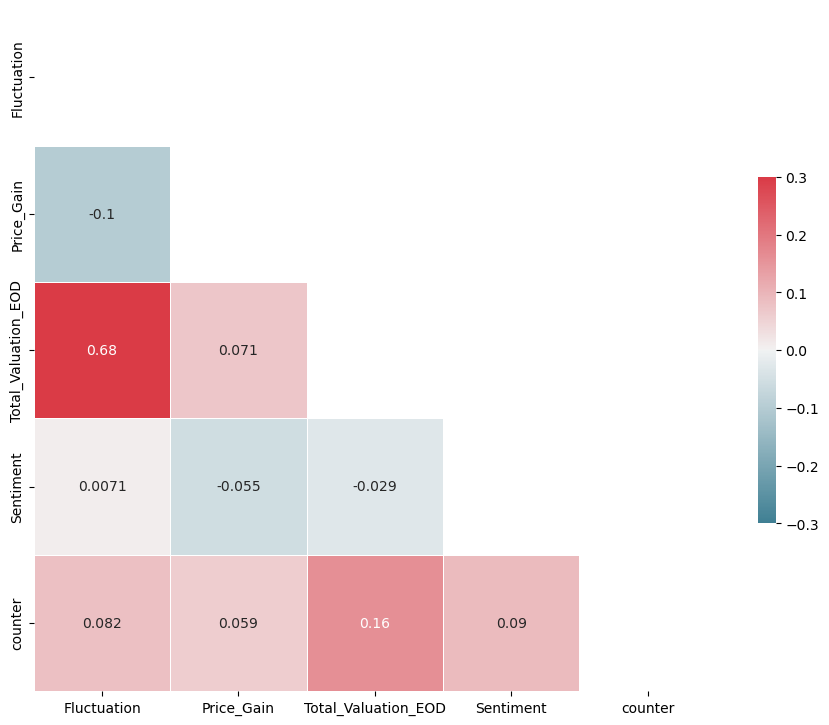

In [35]:
# correlation matrix
corr = ovr_neg_apple_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# drawing heatmap
sns.heatmap(
    corr,          
    mask=mask,     
    cmap=cmap,     
    annot=True,    
    vmax=.3,      
    vmin=-.3,     
    center=0,      
    square=True,   
    linewidths=.5, 
    cbar_kws={"shrink": .5}
    
)

# SVM based prediction of stock movement based on sentiment
##  case1: Tesla


In [36]:
## importing libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
tesla=tesla_df
drop=['Date_x','Stock_Name_x','Company_Name','Sentiment','Open','High','Low','Volume','Fluctuation','Price_Gain','Total_Valuation_EOD']
tesla.drop(columns=drop, inplace=True)
tesla

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\2634042392.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.drop(columns=drop, inplace=True)


,Date_string_x,Tweet,Close,counter
0,2022-09-29,mainstream media has done an amazing job at br...,268.209992,1
2,2022-09-29,even if i include m unvested rsus as of...,268.209992,1
3,2022-09-29,hahaha why are you still trying to stop tes...,268.209992,1
4,2022-09-29,stop trying to kill kids you sad deranged o...,268.209992,1
6,2022-09-29,for years viciously silenced critics failin...,268.209992,1
...,...,...,...,...
24201,2021-09-30,if humans could tell the difference between li...,258.493347,1
24203,2021-09-30,playing in the dirt and,258.493347,1
24204,2021-09-30,i agree with that tsla s ev business alone ...,258.493347,1
24206,2021-09-30,get ready for a tsla q delivery...,258.493347,1


In [37]:
def get_sentiment_scores(tweet):
    scores = analyzer.polarity_scores(tweet)
    return scores

tesla['Sentiment_Scores'] = tesla['Tweet'].apply(get_sentiment_scores)
tesla[['Positive', 'Neutral', 'Negative', 'Compound']] = tesla['Sentiment_Scores'].apply(pd.Series)
tesla

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\900420656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla['Sentiment_Scores'] = tesla['Tweet'].apply(get_sentiment_scores)
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\900420656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla[['Positive', 'Neutral', 'Negative', 'Compound']] = tesla['Sentiment_Scores'].apply(pd.Series)
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\900420656.py:6: SettingWithCopyWarning: 
A value is trying to be se

,Date_string_x,Tweet,Close,counter,Sentiment_Scores,Positive,Neutral,Negative,Compound
0,2022-09-29,mainstream media has done an amazing job at br...,268.209992,1,"{'neg': 0.129, 'neu': 0.754, 'pos': 0.117, 'co...",0.129,0.754,0.117,0.0772
2,2022-09-29,even if i include m unvested rsus as of...,268.209992,1,"{'neg': 0.0, 'neu': 0.937, 'pos': 0.062, 'comp...",0.000,0.937,0.062,0.2960
3,2022-09-29,hahaha why are you still trying to stop tes...,268.209992,1,"{'neg': 0.282, 'neu': 0.569, 'pos': 0.148, 'co...",0.282,0.569,0.148,-0.7096
4,2022-09-29,stop trying to kill kids you sad deranged o...,268.209992,1,"{'neg': 0.588, 'neu': 0.412, 'pos': 0.0, 'comp...",0.588,0.412,0.000,-0.8750
6,2022-09-29,for years viciously silenced critics failin...,268.209992,1,"{'neg': 0.343, 'neu': 0.609, 'pos': 0.048, 'co...",0.343,0.609,0.048,-0.9325
...,...,...,...,...,...,...,...,...,...
24201,2021-09-30,if humans could tell the difference between li...,258.493347,1,"{'neg': 0.102, 'neu': 0.641, 'pos': 0.257, 'co...",0.102,0.641,0.257,0.9051
24203,2021-09-30,playing in the dirt and,258.493347,1,"{'neg': 0.333, 'neu': 0.417, 'pos': 0.25, 'com...",0.333,0.417,0.250,-0.1531
24204,2021-09-30,i agree with that tsla s ev business alone ...,258.493347,1,"{'neg': 0.084, 'neu': 0.691, 'pos': 0.225, 'co...",0.084,0.691,0.225,0.7003
24206,2021-09-30,get ready for a tsla q delivery...,258.493347,1,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp...",0.000,0.703,0.297,0.4215


In [38]:
tesla['Sentiment']=tesla['Compound']
drop=['Sentiment_Scores','Positive','Neutral','Negative','Compound','Tweet']
tesla.drop(columns=drop, inplace=True)
tesla

C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\1092523194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla['Sentiment']=tesla['Compound']
C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\1092523194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla.drop(columns=drop, inplace=True)


,Date_string_x,Close,counter,Sentiment
0,2022-09-29,268.209992,1,0.0772
2,2022-09-29,268.209992,1,0.2960
3,2022-09-29,268.209992,1,-0.7096
4,2022-09-29,268.209992,1,-0.8750
6,2022-09-29,268.209992,1,-0.9325
...,...,...,...,...
24201,2021-09-30,258.493347,1,0.9051
24203,2021-09-30,258.493347,1,-0.1531
24204,2021-09-30,258.493347,1,0.7003
24206,2021-09-30,258.493347,1,0.4215


In [39]:
tesla2=tesla

tesla2['Date'] = pd.to_datetime(tesla2['Date_string_x']).dt.date  

# grouping by date, calculate mean sentiment and count number of tweets
final = tesla2.groupby('Date').agg({
    'Sentiment': 'mean',  
    'Date_string_x': 'count',        
    'Close': 'last'  
}).reset_index()
final.columns = ['Date', 'Mean_Sentiment', 'Num_Tweets', 'Close']
print(final)

           Date  Mean_Sentiment  Num_Tweets       Close
0    2021-09-30        0.239379          78  258.493347
1    2021-10-11        0.280274          65  355.983337
2    2021-10-12        0.262293          86  339.010010
3    2021-10-13        0.225837          67  270.359985
4    2021-10-14        0.317530          64  272.773346
..          ...             ...         ...         ...
208  2022-09-23        0.190059          61  275.329987
209  2022-09-26        0.234525          60  276.010010
210  2022-09-27        0.254294          66  282.940002
211  2022-09-28        0.179411          61  287.809998
212  2022-09-29        0.072040          88  268.209992

[213 rows x 4 columns]


C:\Users\sinha\AppData\Local\Temp\ipykernel_26728\3852014809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla2['Date'] = pd.to_datetime(tesla2['Date_string_x']).dt.date


In [40]:
## predicting closing value of stock based on a 3 day window of previous closing prices, sentiments, and number of tweets
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    # creating empty lists "X_close", "X_sentiment", "X_ts" and y
    X_close = []
    X_sentiment = []
    X_ts = []
    y = []
    for i in range(len(df) - window):
        
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_sentiment = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]
        
        X_close.append(close)
        X_sentiment.append(ts_sentiment)
        X_ts.append(tw_vol)
        y.append(target)
        
    return np.hstack((X_close,X_sentiment,X_ts)), np.array(y).reshape(-1, 1)
     

In [41]:
window_size = 3
# column index 3 is the `Close` column
# column index 1 is the `Mean_Sentiment` column
# column index 2 is the `Num_tweets` column
feature_col_number1 = 3
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 3
X, y = window_data(final, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)
print(X)

[[258.4933472 355.9833374 339.0100098 ...  78.         65.
   86.       ]
 [355.9833374 339.0100098 270.3599854 ...  65.         86.
   67.       ]
 [339.0100098 270.3599854 272.7733459 ...  86.         67.
   64.       ]
 ...
 [288.5899963 275.3299866 276.0100098 ...  65.         61.
   60.       ]
 [275.3299866 276.0100098 282.9400024 ...  61.         60.
   66.       ]
 [276.0100098 282.9400024 287.8099976 ...  60.         66.
   61.       ]]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)


In [43]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import r2_score
model = svm.SVR()
# Fit the model
model.fit(X_train, y_train.ravel())
print(model.score(X_test,y_test))

0.2188904312595099


In [44]:
y_pred = model.predict(X_test)
print(y_pred)
print(r2_score(y_test, y_pred))

[302.04812396 302.47051038 303.29300277 295.23588072 300.05049958
 293.45077426 299.16656793 286.82001971 294.92888775 287.29933631
 299.80098861 289.3529348  295.48341981 303.77011551 292.57712425
 291.24145947 301.15642771 285.89294363 293.75318682 294.36017332
 286.63503386]
0.2188904312595099


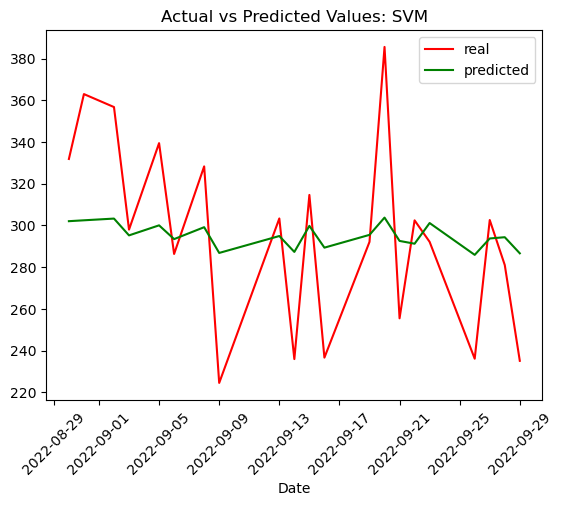

In [45]:
predicted_prices = y_pred.reshape(-1, 1)
real_prices = y_test.reshape(-1, 1)
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stocks['Date'] = final['Date'][-len(real_prices):].reset_index(drop=True)  

stocks.set_index('Date', inplace=True)  
stocks.head()

plt.plot(stocks['Real'], color='r', label='real')
plt.plot(stocks['Predicted'], color='g', label='predicted')
plt.title("Actual vs Predicted Values: SVM")
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)

plt.show()


## Observation : 
### Clearly we can see that the tweet volume and sentiment score are unable to predict the closing price of stock. 
### But can we infer the general trend of the market using the tweet volume and sentiment score. This can be done by comparing slopes of the predicted price and real price of stock with time.

In [46]:
real_values = stocks['Real'].values
predicted_values = stocks['Predicted'].values

real_slopes = np.diff(real_values)  
real_slopes = np.insert(real_slopes, 0, 0)  

predicted_slopes = np.diff(predicted_values)  
predicted_slopes = np.insert(predicted_slopes, 0, 0)

In [47]:
real_slope_signs = np.sign(real_slopes)

predicted_slope_signs = np.sign(predicted_slopes)

In [48]:
matching_signs = (real_slope_signs == predicted_slope_signs)

accuracy = np.mean(matching_signs) * 100
print(f"Accuracy of slope sign comparison: {accuracy}%")

Accuracy of slope sign comparison: 80.95238095238095%


### Accuracy of comparing slopes is 80.95% showing that while tweet volume and sentiment score are not good metrics to model the closing price of a stock. They can be used to predict the general trend of the market to a good degree

## Linear Reg

In [49]:
tesla = tweet_data[tweet_data['Stock_Name'] == 'TSLA']

In [50]:
tesla = tesla[tesla['Sentiment'] != 0]

In [51]:
tesla = tesla.drop(columns=['anchor', 'Date', 'Company_Name'], axis=1)

In [52]:
tesla.head()

,Date_string,Tweet,Stock_Name,Sentiment
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,0.0772
2,2022-09-29,even if i include m unvested rsus as of...,TSLA,0.2960
3,2022-09-29,hahaha why are you still trying to stop tes...,TSLA,-0.7096
4,2022-09-29,stop trying to kill kids you sad deranged o...,TSLA,-0.8750
6,2022-09-29,for years viciously silenced critics failin...,TSLA,-0.9325


In [53]:
dates = tesla['Date_string'].unique()
average = {}
for i in dates:
    filtered_date = tesla[tesla['Date_string'] == i]
    average_value = filtered_date['Sentiment'].mean()
    average[i] = average_value
tesla_f = pd.DataFrame(list(average.items()), columns=['Date', 'Sentiment'])

In [54]:
tesla_f

,Date,Sentiment
0,2022-09-29,0.072040
1,2022-09-28,0.179411
2,2022-09-27,0.254294
3,2022-09-26,0.234525
4,2022-09-25,0.180717
...,...,...
360,2021-10-04,0.186501
361,2021-10-03,0.370178
362,2021-10-02,0.389431
363,2021-10-01,0.324948


In [55]:
tesla_stock = stock_data[stock_data['Stock_Name'] == 'TSLA']
stock_f = tesla_stock.drop(columns=['anchor', 'Date_string', 'Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Stock_Name', 'Fluctuation', 'Price_Gain', 'Total_Valuation_EOD'], axis=1)
stock_f.head()

,Date,Close
0,2021-09-30,258.493347
1,2021-01-10,258.406677
2,2021-04-10,260.510010
3,2021-05-10,260.196655
4,2021-06-10,260.916656


In [56]:
tesla_p = pd.merge(tesla_f, stock_f, on='Date', how='inner')

In [57]:
tesla_p['Close_1'] = tesla_p['Close']
tesla_p['Close_2'] = tesla_p['Close']
tesla_p['Close_3'] = tesla_p['Close']

In [58]:
tesla_p['Close_1'] = tesla_p['Close'].shift(1)
tesla_p['Close_2'] = tesla_p['Close'].shift(2)
tesla_p['Close_3'] = tesla_p['Close'].shift(3)

In [59]:
tesla_p = tesla_p.drop(0)

In [60]:
tesla_p = tesla_p.drop(1)

In [61]:
tesla_p = tesla_p.drop(2)

tesla_d = tesla_p

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]  # using sentiment as the feature
y = tesla_p['Close']      # predicting the closing price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# model training
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)


0.3102219349408901

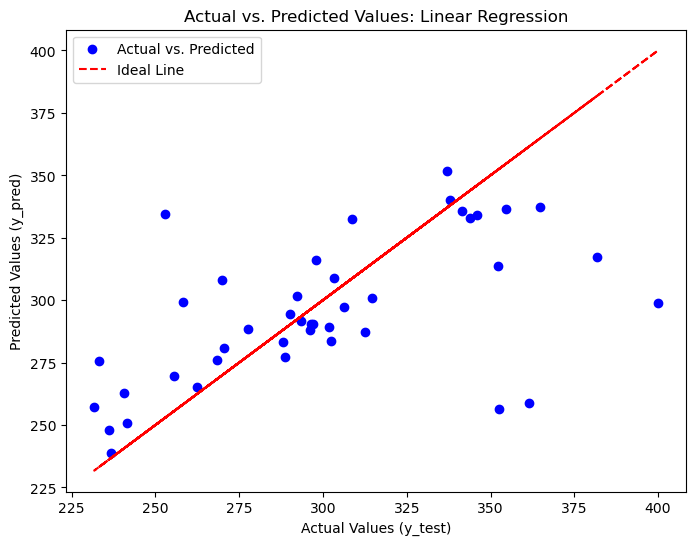

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values: Linear Regression')
plt.legend()
plt.show()


In [64]:
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]
y = tesla_p['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# building the ANN model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # for regression - no activation function 
model.compile(optimizer='adam', loss='mean_squared_error')  
# model training
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")






Epoch 1/1000

6/6 [==============================] - 2s 6ms/step - loss: 184068.0000
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 125611.5234
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 81374.6641
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 51243.0078
Epoch 5/1000
6/6 [==============================] - 0s 3ms/step - loss: 28903.3574
Epoch 6/1000
6/6 [==============================] - 0s 2ms/step - loss: 13996.8828
Epoch 7/1000
6/6 [==============================] - 0s 3ms/step - loss: 5762.8164
Epoch 8/1000
6/6 [==============================] - 0s 3ms/step - loss: 1980.4475
Epoch 9/1000
6/6 [==============================] - 0s 3ms/step - loss: 1209.3702
Epoch 10/1000
6/6 [==============================] - 0s 3ms/step - loss: 1491.8469
Epoch 11/1000
6/6 [==============================] - 0s 3ms/step - loss: 1611.0803
Epoch 12/1000
6/6 [==============================] - 0s 5ms/step - loss: 1415.9401
E

6/6 [==============================] - 0s 3ms/step - loss: 985.6041
Epoch 90/1000
6/6 [==============================] - 0s 3ms/step - loss: 985.0487
Epoch 91/1000
6/6 [==============================] - 0s 6ms/step - loss: 987.7610
Epoch 92/1000
6/6 [==============================] - 0s 3ms/step - loss: 986.5527
Epoch 93/1000
6/6 [==============================] - 0s 3ms/step - loss: 983.4200
Epoch 94/1000
6/6 [==============================] - 0s 3ms/step - loss: 978.8751
Epoch 95/1000
6/6 [==============================] - 0s 3ms/step - loss: 979.7995
Epoch 96/1000
6/6 [==============================] - 0s 7ms/step - loss: 976.2903
Epoch 97/1000
6/6 [==============================] - 0s 6ms/step - loss: 969.7704
Epoch 98/1000
6/6 [==============================] - 0s 6ms/step - loss: 974.1928
Epoch 99/1000
6/6 [==============================] - 0s 6ms/step - loss: 970.1757
Epoch 100/1000
6/6 [==============================] - 0s 6ms/step - loss: 989.0690
Epoch 101/1000
6/6 [=========

6/6 [==============================] - 0s 3ms/step - loss: 949.2033
Epoch 189/1000
6/6 [==============================] - 0s 3ms/step - loss: 958.7022
Epoch 190/1000
6/6 [==============================] - 0s 6ms/step - loss: 958.8477
Epoch 191/1000
6/6 [==============================] - 0s 5ms/step - loss: 941.2992
Epoch 192/1000
6/6 [==============================] - 0s 3ms/step - loss: 940.6900
Epoch 193/1000
6/6 [==============================] - 0s 6ms/step - loss: 944.7241
Epoch 194/1000
6/6 [==============================] - 0s 7ms/step - loss: 945.4047
Epoch 195/1000
6/6 [==============================] - 0s 6ms/step - loss: 943.6236
Epoch 196/1000
6/6 [==============================] - 0s 3ms/step - loss: 947.0819
Epoch 197/1000
6/6 [==============================] - 0s 3ms/step - loss: 953.5629
Epoch 198/1000
6/6 [==============================] - 0s 3ms/step - loss: 941.6329
Epoch 199/1000
6/6 [==============================] - 0s 3ms/step - loss: 941.3132
Epoch 200/1000
6/6 

6/6 [==============================] - 0s 5ms/step - loss: 934.9272
Epoch 287/1000
6/6 [==============================] - 0s 7ms/step - loss: 937.0521
Epoch 288/1000
6/6 [==============================] - 0s 4ms/step - loss: 933.5645
Epoch 289/1000
6/6 [==============================] - 0s 5ms/step - loss: 944.5787
Epoch 290/1000
6/6 [==============================] - 0s 6ms/step - loss: 932.2161
Epoch 291/1000
6/6 [==============================] - 0s 4ms/step - loss: 938.3267
Epoch 292/1000
6/6 [==============================] - 0s 4ms/step - loss: 941.0959
Epoch 293/1000
6/6 [==============================] - 0s 2ms/step - loss: 935.9469
Epoch 294/1000
6/6 [==============================] - 0s 3ms/step - loss: 934.1755
Epoch 295/1000
6/6 [==============================] - 0s 4ms/step - loss: 937.8406
Epoch 296/1000
6/6 [==============================] - 0s 4ms/step - loss: 932.5755
Epoch 297/1000
6/6 [==============================] - 0s 7ms/step - loss: 932.8751
Epoch 298/1000
6/6 

6/6 [==============================] - 0s 5ms/step - loss: 927.6960
Epoch 385/1000
6/6 [==============================] - 0s 5ms/step - loss: 938.8889
Epoch 386/1000
6/6 [==============================] - 0s 5ms/step - loss: 956.4398
Epoch 387/1000
6/6 [==============================] - 0s 7ms/step - loss: 935.9235
Epoch 388/1000
6/6 [==============================] - 0s 4ms/step - loss: 932.0350
Epoch 389/1000
6/6 [==============================] - 0s 5ms/step - loss: 943.8370
Epoch 390/1000
6/6 [==============================] - 0s 5ms/step - loss: 944.1656
Epoch 391/1000
6/6 [==============================] - 0s 5ms/step - loss: 927.0149
Epoch 392/1000
6/6 [==============================] - 0s 4ms/step - loss: 933.9789
Epoch 393/1000
6/6 [==============================] - 0s 3ms/step - loss: 927.7987
Epoch 394/1000
6/6 [==============================] - 0s 5ms/step - loss: 927.8812
Epoch 395/1000
6/6 [==============================] - 0s 5ms/step - loss: 941.2891
Epoch 396/1000
6/6 

6/6 [==============================] - 0s 4ms/step - loss: 930.4854
Epoch 483/1000
6/6 [==============================] - 0s 4ms/step - loss: 919.4714
Epoch 484/1000
6/6 [==============================] - 0s 7ms/step - loss: 929.6469
Epoch 485/1000
6/6 [==============================] - 0s 6ms/step - loss: 919.2741
Epoch 486/1000
6/6 [==============================] - 0s 5ms/step - loss: 927.5702
Epoch 487/1000
6/6 [==============================] - 0s 6ms/step - loss: 922.7097
Epoch 488/1000
6/6 [==============================] - 0s 4ms/step - loss: 928.8152
Epoch 489/1000
6/6 [==============================] - 0s 4ms/step - loss: 927.5345
Epoch 490/1000
6/6 [==============================] - 0s 7ms/step - loss: 935.4890
Epoch 491/1000
6/6 [==============================] - 0s 4ms/step - loss: 922.7649
Epoch 492/1000
6/6 [==============================] - 0s 3ms/step - loss: 933.2413
Epoch 493/1000
6/6 [==============================] - 0s 3ms/step - loss: 930.5515
Epoch 494/1000
6/6 

6/6 [==============================] - 0s 4ms/step - loss: 918.1019
Epoch 581/1000
6/6 [==============================] - 0s 3ms/step - loss: 917.8986
Epoch 582/1000
6/6 [==============================] - 0s 3ms/step - loss: 928.1282
Epoch 583/1000
6/6 [==============================] - 0s 4ms/step - loss: 922.9001
Epoch 584/1000
6/6 [==============================] - 0s 4ms/step - loss: 918.2658
Epoch 585/1000
6/6 [==============================] - 0s 6ms/step - loss: 1004.6239
Epoch 586/1000
6/6 [==============================] - 0s 6ms/step - loss: 927.2413
Epoch 587/1000
6/6 [==============================] - 0s 7ms/step - loss: 949.1990
Epoch 588/1000
6/6 [==============================] - 0s 7ms/step - loss: 924.3716
Epoch 589/1000
6/6 [==============================] - 0s 7ms/step - loss: 918.5587
Epoch 590/1000
6/6 [==============================] - 0s 7ms/step - loss: 924.3068
Epoch 591/1000
6/6 [==============================] - 0s 7ms/step - loss: 935.8557
Epoch 592/1000
6/6

6/6 [==============================] - 0s 5ms/step - loss: 908.9398
Epoch 679/1000
6/6 [==============================] - 0s 4ms/step - loss: 906.8826
Epoch 680/1000
6/6 [==============================] - 0s 5ms/step - loss: 905.8439
Epoch 681/1000
6/6 [==============================] - 0s 4ms/step - loss: 906.2214
Epoch 682/1000
6/6 [==============================] - 0s 6ms/step - loss: 911.5705
Epoch 683/1000
6/6 [==============================] - 0s 3ms/step - loss: 910.6823
Epoch 684/1000
6/6 [==============================] - 0s 3ms/step - loss: 918.9732
Epoch 685/1000
6/6 [==============================] - 0s 4ms/step - loss: 913.8670
Epoch 686/1000
6/6 [==============================] - 0s 4ms/step - loss: 913.7891
Epoch 687/1000
6/6 [==============================] - 0s 6ms/step - loss: 939.5763
Epoch 688/1000
6/6 [==============================] - 0s 6ms/step - loss: 920.1370
Epoch 689/1000
6/6 [==============================] - 0s 6ms/step - loss: 903.3334
Epoch 690/1000
6/6 

6/6 [==============================] - 0s 7ms/step - loss: 903.0804
Epoch 777/1000
6/6 [==============================] - 0s 6ms/step - loss: 906.6458
Epoch 778/1000
6/6 [==============================] - 0s 7ms/step - loss: 915.4540
Epoch 779/1000
6/6 [==============================] - 0s 6ms/step - loss: 914.7219
Epoch 780/1000
6/6 [==============================] - 0s 3ms/step - loss: 933.7662
Epoch 781/1000
6/6 [==============================] - 0s 3ms/step - loss: 911.4722
Epoch 782/1000
6/6 [==============================] - 0s 6ms/step - loss: 900.8348
Epoch 783/1000
6/6 [==============================] - 0s 4ms/step - loss: 907.9407
Epoch 784/1000
6/6 [==============================] - 0s 3ms/step - loss: 898.3707
Epoch 785/1000
6/6 [==============================] - 0s 4ms/step - loss: 897.6804
Epoch 786/1000
6/6 [==============================] - 0s 607us/step - loss: 910.8746
Epoch 787/1000
6/6 [==============================] - 0s 4ms/step - loss: 895.4425
Epoch 788/1000
6/

6/6 [==============================] - 0s 5ms/step - loss: 909.8841
Epoch 875/1000
6/6 [==============================] - 0s 4ms/step - loss: 883.5999
Epoch 876/1000
6/6 [==============================] - 0s 3ms/step - loss: 904.8812
Epoch 877/1000
6/6 [==============================] - 0s 4ms/step - loss: 963.7189
Epoch 878/1000
6/6 [==============================] - 0s 4ms/step - loss: 888.5261
Epoch 879/1000
6/6 [==============================] - 0s 4ms/step - loss: 940.3867
Epoch 880/1000
6/6 [==============================] - 0s 5ms/step - loss: 905.6089
Epoch 881/1000
6/6 [==============================] - 0s 4ms/step - loss: 885.8927
Epoch 882/1000
6/6 [==============================] - 0s 4ms/step - loss: 926.1453
Epoch 883/1000
6/6 [==============================] - 0s 2ms/step - loss: 883.7031
Epoch 884/1000
6/6 [==============================] - 0s 2ms/step - loss: 895.3155
Epoch 885/1000
6/6 [==============================] - 0s 4ms/step - loss: 914.7844
Epoch 886/1000
6/6 

6/6 [==============================] - 0s 7ms/step - loss: 921.7518
Epoch 973/1000
6/6 [==============================] - 0s 6ms/step - loss: 1013.1650
Epoch 974/1000
6/6 [==============================] - 0s 4ms/step - loss: 881.3558
Epoch 975/1000
6/6 [==============================] - 0s 4ms/step - loss: 921.6968
Epoch 976/1000
6/6 [==============================] - 0s 4ms/step - loss: 906.0177
Epoch 977/1000
6/6 [==============================] - 0s 3ms/step - loss: 899.0215
Epoch 978/1000
6/6 [==============================] - 0s 4ms/step - loss: 882.5753
Epoch 979/1000
6/6 [==============================] - 0s 4ms/step - loss: 873.3168
Epoch 980/1000
6/6 [==============================] - 0s 5ms/step - loss: 867.4548
Epoch 981/1000
6/6 [==============================] - 0s 5ms/step - loss: 870.7850
Epoch 982/1000
6/6 [==============================] - 0s 4ms/step - loss: 879.1284
Epoch 983/1000
6/6 [==============================] - 0s 4ms/step - loss: 886.5028
Epoch 984/1000
6/6

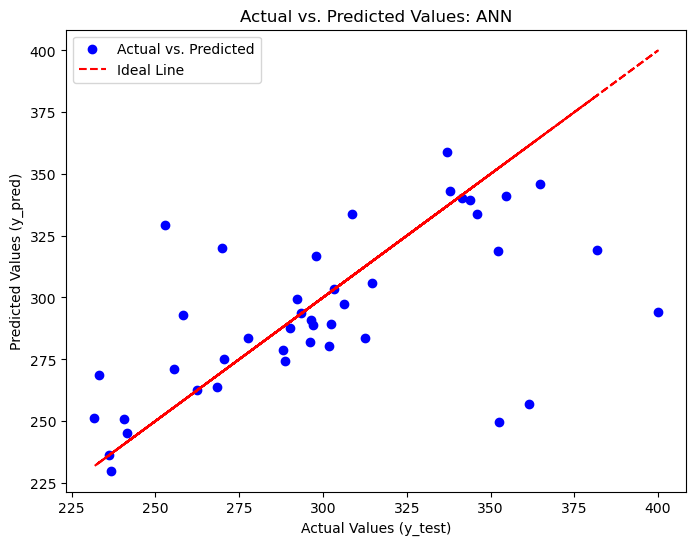

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values: ANN')
plt.legend()
plt.show()


## Classification

### Using Linear

In [66]:
from sklearn.metrics import accuracy_score
# resetting index to avoid out of index error
tesla_p=tesla_p.reset_index()
X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]  # features
y = tesla_p['Close']  # target variable (regression)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
threshold_values = tesla_p['Close_1']

# convert regression target variable to binary classes based on the threshold
y_train_class = (y_train > threshold_values.iloc[y_train.index]).astype(int)
y_test_class = (y_test > threshold_values.iloc[y_test.index]).astype(int)
# model training
model = LinearRegression()
model.fit(X_train, y_train_class)
y_pred_class = (model.predict(X_test) > threshold_values.iloc[y_test.index]).astype(int)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4523809523809524


### USING ANN

In [67]:
X = tesla_p[['Sentiment', 'Close_1', 'Close_2', 'Close_3']]  # features
y = tesla_p['Close']  # target variable (regression)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Setting previous day's closing as the classification target
threshold_values = tesla_p['Close_1']
y_train_class = (y_train > threshold_values.iloc[y_train.index]).astype(int)
y_test_class = (y_test > threshold_values.iloc[y_test.index]).astype(int)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN model building
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model training
model.fit(X_train, y_train_class, epochs=50, batch_size=32, validation_data=(X_test, y_test_class))

loss, accuracy = model.evaluate(X_test, y_test_class)
print(f"Accuracy: {accuracy}")


Epoch 1/50

6/6 [==============================] - 2s 64ms/step - loss: 0.6832 - accuracy: 0.5357 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 0s 14ms/step - loss: 0.6729 - accuracy: 0.6071 - val_loss: 0.6875 - val_accuracy: 0.5714
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 0.6663 - accuracy: 0.6607 - val_loss: 0.6845 - val_accuracy: 0.5952
Epoch 4/50
6/6 [==============================] - 0s 22ms/step - loss: 0.6612 - accuracy: 0.6429 - val_loss: 0.6815 - val_accuracy: 0.5952
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.6554 - accuracy: 0.6607 - val_loss: 0.6804 - val_accuracy: 0.5952
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 0.6515 - accuracy: 0.6726 - val_loss: 0.6801 - val_accuracy: 0.5714
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 0.6475 - accuracy: 0.6726 - val_loss: 0.6802 - val_accuracy: 0.5714
Epoch 8/50
6/6 [==========